In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier

In [2]:
dfad= pd.read_csv (r"C:\Users\MiCachi\Documents\skils-pyt\ia\alz\oasis_longitudinal.csv")
dfad.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034


In [3]:
# Eliminamos datos nulos 
dfad.dropna(subset=["SES","MMSE"], inplace=True)
dfad.head(10)

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
5,OAS2_0004,OAS2_0004_MR1,Nondemented,1,0,F,R,88,18,3.0,28.0,0.0,1215,0.710,1.444
6,OAS2_0004,OAS2_0004_MR2,Nondemented,2,538,F,R,90,18,3.0,27.0,0.0,1200,0.718,1.462
7,OAS2_0005,OAS2_0005_MR1,Nondemented,1,0,M,R,80,12,4.0,28.0,0.0,1689,0.712,1.039
8,OAS2_0005,OAS2_0005_MR2,Nondemented,2,1010,M,R,83,12,4.0,29.0,0.5,1701,0.711,1.032
9,OAS2_0005,OAS2_0005_MR3,Nondemented,3,1603,M,R,85,12,4.0,30.0,0.0,1699,0.705,1.033
13,OAS2_0008,OAS2_0008_MR1,Nondemented,1,0,F,R,93,14,2.0,30.0,0.0,1272,0.698,1.380
14,OAS2_0008,OAS2_0008_MR2,Nondemented,2,742,F,R,95,14,2.0,29.0,0.0,1257,0.703,1.396
15,OAS2_0009,OAS2_0009_MR1,Demented,1,0,M,R,68,12,2.0,27.0,0.5,1457,0.806,1.205


In [4]:
dfad.isnull(). sum (). sum ()

0

Por la falla de ambos arboles usare otros modelos K-Vecinos Más Cercanos (KNN)

Cambiar data categorica a numerica para que este modelo sea viable

lo vamos a hacer mapeando un diccionario

In [5]:
dfad3 = dfad.loc[:,["Subject ID","Age","EDUC","SES","eTIV", "nWBV","ASF", "Group"]]
dfad3.head()

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,Nondemented
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,Nondemented
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,Nondemented
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,Nondemented
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,Nondemented


In [6]:
Groups = {"Nondemented":0, "Demented":1, "Converted":2}

In [7]:
dfad3["Group"] = dfad3["Group"].map(Groups)
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


K-Vecinos Más Cercanos (KNN)

In [8]:
dfad3

,Subject ID,Age,EDUC,SES,eTIV,nWBV,ASF,Group
0,OAS2_0001,87,14,2.0,1987,0.696,0.883,0
1,OAS2_0001,88,14,2.0,2004,0.681,0.876,0
5,OAS2_0004,88,18,3.0,1215,0.710,1.444,0
6,OAS2_0004,90,18,3.0,1200,0.718,1.462,0
7,OAS2_0005,80,12,4.0,1689,0.712,1.039,0
...,...,...,...,...,...,...,...,...
368,OAS2_0185,82,16,1.0,1693,0.694,1.037,1
369,OAS2_0185,86,16,1.0,1688,0.675,1.040,1
370,OAS2_0186,61,13,2.0,1319,0.801,1.331,0
371,OAS2_0186,63,13,2.0,1327,0.796,1.323,0


In [9]:
mal = dfad3[dfad3["Group"]== 1]
bien = dfad3[dfad3["Group"]== 0 ]
incierto = dfad3[dfad3["Group"]== 2]
mal, bien, incierto

(    Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 15   OAS2_0009   68    12  2.0  1457  0.806  1.205      1
 16   OAS2_0009   69    12  2.0  1480  0.791  1.186      1
 17   OAS2_0010   66    12  3.0  1447  0.769  1.213      1
 18   OAS2_0010   68    12  3.0  1482  0.752  1.184      1
 25   OAS2_0014   76    16  3.0  1602  0.697  1.096      1
 ..         ...  ...   ...  ...   ...    ...    ...    ...
 365  OAS2_0184   72    16  3.0  1354  0.733  1.296      1
 366  OAS2_0184   73    16  3.0  1351  0.708  1.299      1
 367  OAS2_0185   80    16  1.0  1704  0.711  1.030      1
 368  OAS2_0185   82    16  1.0  1693  0.694  1.037      1
 369  OAS2_0185   86    16  1.0  1688  0.675  1.040      1
 
 [127 rows x 8 columns],
     Subject ID  Age  EDUC  SES  eTIV   nWBV    ASF  Group
 0    OAS2_0001   87    14  2.0  1987  0.696  0.883      0
 1    OAS2_0001   88    14  2.0  2004  0.681  0.876      0
 5    OAS2_0004   88    18  3.0  1215  0.710  1.444      0
 6    OAS2_0004   90    18  3

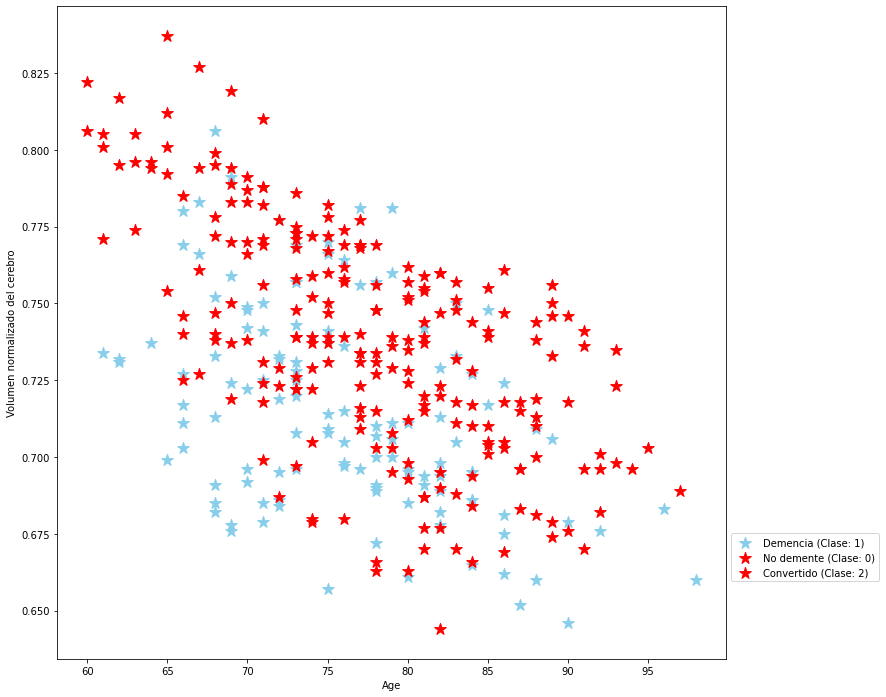

In [10]:
plt.figure(figsize=(12,12))
plt.scatter(mal["Age"], mal["nWBV"],
            marker="*", s=150, color="skyblue",
            label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["nWBV"],
            marker="*", s=150, color="red", 
            label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["nWBV"],
            marker="*", s=150, color="red", 
            label="Convertido (Clase: 2)")

plt.ylabel("Volumen normalizado del cerebro")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.2)) 
plt.show()

In [12]:
data = dfad3[["Age","nWBV",]]
clase = dfad3["Group"]

escalador = preprocessing.MinMaxScaler()
# los numeros mas pequeños lo shace ceros y los mas grandes uno 
# para que quede un rango de cero a uno
data = escalador.fit_transform(data)
data

array([[0.71052632, 0.26943005],
       [0.73684211, 0.19170984],
       [0.73684211, 0.34196891],
       [0.78947368, 0.38341969],
       [0.52631579, 0.35233161],
       [0.60526316, 0.34715026],
       [0.65789474, 0.31606218],
       [0.86842105, 0.27979275],
       [0.92105263, 0.30569948],
       [0.21052632, 0.83937824],
       [0.23684211, 0.76165803],
       [0.15789474, 0.64766839],
       [0.21052632, 0.55958549],
       [0.47368421, 0.5388601 ],
       [0.52631579, 0.48704663],
       [0.60526316, 0.38341969],
       [0.55263158, 0.36787565],
       [0.57894737, 0.39378238],
       [0.65789474, 0.34196891],
       [0.42105263, 0.2746114 ],
       [0.44736842, 0.26943005],
       [0.73684211, 0.08290155],
       [0.78947368, 0.01036269],
       [0.52631579, 0.55958549],
       [0.55263158, 0.59585492],
       [0.65789474, 0.57512953],
       [0.68421053, 0.60621762],
       [0.71052632, 0.36787565],
       [0.73684211, 0.35751295],
       [0.84210526, 0.26943005],
       [0.

Creación del Modelo KNN Valor de K

In [13]:
n_neighbors = 354**(1/2)
print (n_neighbors)

18.81488772222678


In [14]:
clasificador = KNeighborsClassifier(n_neighbors=18)
# numero de vecinos esta definido a priori 
# un metodo utilizado es usar la raiz cuadrada del numero de instancias 
# con las que se esta creando el modelo, es decir, el numero de N
clasificador.fit(data, clase)

KNeighborsClassifier(n_neighbors=18)

C:\Users\MiCachi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Clase: [0]
Probabilidades por clase [[0.5        0.27777778 0.22222222]]


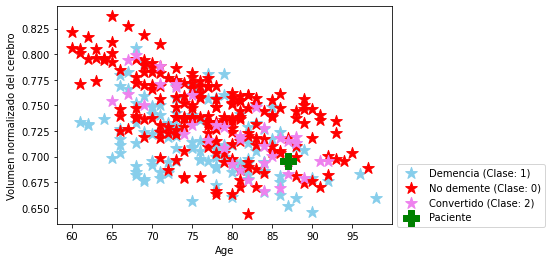

In [19]:
Age = 87
nWBV = 0.696
#Escalar los datos del nuevo solicitante
paciente = escalador.transform([[Age, nWBV]])

#Calcular clase y probabilidades
print("Clase:", clasificador.predict(paciente))
print("Probabilidades por clase",
      clasificador.predict_proba(paciente))

#Código para graficar
plt.scatter(mal["Age"], mal["nWBV"],
            marker="*", s=150, color="skyblue", label="Demencia (Clase: 1)")

plt.scatter(bien["Age"], bien["nWBV"],
            marker="*", s=150, color="red", label="No demente (Clase: 0)")

plt.scatter(incierto["Age"], incierto["nWBV"],
            marker="*", s=150, color="violet",  label="Convertido (Clase: 2)")

plt.scatter(Age, nWBV, marker="P", s=250, color="green", label="Paciente") 
plt.ylabel("Volumen normalizado del cerebro")
plt.xlabel("Age")
plt.legend(bbox_to_anchor=(1, 0.3))
plt.show()